In [2]:
from google.colab import drive
drive.mount("/content/drive/")

Mounted at /content/drive/


In [3]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [4]:
# Specify the path to search
search_path = '/content/drive/MyDrive/ElectionForecast'

# Function to search for the folder
def find_folder(folder_name, path):
    for root, dirs, files in os.walk(path):
        if folder_name in dirs:
            return os.path.join(root, folder_name)
    return None

# Search for "election2020" folder
folder_path = find_folder('ElectionData2020', search_path)

if folder_path:
    print(f"Folder found: {folder_path}")
else:
    print("Folder not found.")

dataframes = []

# Loop through all CSV files in the specified directory
files_alphabetical = []

electoral_college_2020 = pd.read_csv(os.path.join(folder_path, "ElectoralCollege2020.csv"))

for file_name in os.listdir(os.path.join(folder_path,"CompQueries2020")):
    if file_name.endswith('.csv'):
        # Read the CSV file
        files_alphabetical.append(os.path.join(folder_path,"CompQueries2020",file_name))

files_alphabetical.sort()
for file_path in files_alphabetical:
    df = pd.read_csv(file_path, skiprows=[0,1])
    # Ensure that the 'State' column exists and is set as the index
    if 'Region' in df.columns:

        df.set_index('Region', inplace=True)
        df = df.iloc[:,0].str.rstrip('%').astype('float') / 100 - df.iloc[:,1].str.rstrip('%').astype('float') / 100

    # Append the DataFrame to the list
    dataframes.append(df)

search_df = pd.concat(dataframes, axis=1, join="inner")

results = pd.read_csv(os.path.join(folder_path, "2020VotingData.csv"))
results.set_index("Region", inplace=True)

polls = pd.read_csv(os.path.join(folder_path, "StatewideAggregatePolling2020.csv"))
polls = polls.drop(columns=["d_share", "r_share"])

polls = polls.rename(columns={"2_party_dem": "2_party_dem_polls"})
polls = polls.rename(columns={"national": "national_polls"})

polls.set_index("Region", inplace=True)

results = pd.concat([results, polls], axis=1, join="inner")
results = results.drop(columns = ["dem_percent", "rep_percent", "other_percent", "dem_votes", "called", "rep_votes", "other_votes"])
results["poll_diff"] = results['2_party_dem_polls'] - results["2party_dem"]
results = results[["2party_dem", "poll_diff", "2_party_dem_polls", "national_polls"]]

total_data_2020 = pd.concat([results, search_df], axis=1, join="inner")
total_data_2020.reset_index(inplace=True)

poll_result_delta = []
for i in range(len(total_data_2020)):
  poll_result_delta.append(np.abs(total_data_2020["poll_diff"]))

print(np.mean(np.array(poll_result_delta)))

X_array_2020 = total_data_2020.iloc[:, 3:].to_numpy().astype(np.float32)
y_array_2020 = total_data_2020.iloc[:, 2].to_numpy().astype(np.float32)
total_data_2020

Folder found: /content/drive/MyDrive/ElectionForecast/ElectionData2020
0.03145064284705881


,Region,2party_dem,poll_diff,2_party_dem_polls,national_polls,0,1,2,3,4
0,Arizona,0.50,0.010638,0.510638,0.542553,-0.20,-0.82,-0.60,-0.10,-0.08
1,Florida,0.48,0.035789,0.515789,0.542553,0.02,-0.70,-0.64,-0.12,-0.20
2,Georgia,0.50,0.005263,0.505263,0.542553,-0.02,-0.72,-0.68,-0.10,-0.12
3,Iowa,0.46,0.029362,0.489362,0.542553,-0.32,-0.70,-0.50,-0.10,-0.06
4,Michigan,0.51,0.021915,0.531915,0.542553,-0.20,-0.84,-0.60,-0.16,-0.06
5,Minnesota,0.54,0.013191,0.553191,0.542553,0.14,-0.80,-0.54,-0.04,-0.04
6,Nevada,0.51,0.016882,0.526882,0.542553,-0.02,-0.74,-0.56,-0.10,-0.06
7,New Hampshire,0.54,0.017895,0.557895,0.542553,-0.16,-0.66,-0.36,0.00,0.04
8,North Carolina,0.49,0.010000,0.500000,0.542553,0.08,-0.68,-0.54,-0.14,-0.26
9,Ohio,0.46,0.034737,0.494737,0.542553,-0.34,-0.76,-0.60,-0.24,-0.06


In [5]:
# Specify the path to search
search_path = '/content/drive/MyDrive/ElectionForecast'

# Function to search for the folder
def find_folder(folder_name, path):
    for root, dirs, files in os.walk(path):
        if folder_name in dirs:
            return os.path.join(root, folder_name)
    return None

# Search for "election2020" folder
folder_path = find_folder('ElectionData2016', search_path)

if folder_path:
    print(f"Folder found: {folder_path}")
else:
    print("Folder not found.")

dataframes = []

# Loop through all CSV files in the specified directory
files_alphabetical = []

for file_name in os.listdir(os.path.join(folder_path,"CompQueries2016")):
    if file_name.endswith('.csv'):
        # Read the CSV file
        files_alphabetical.append(os.path.join(folder_path,"CompQueries2016",file_name))

files_alphabetical.sort()
for file_path in files_alphabetical:
    df = pd.read_csv(file_path, skiprows=[0,1])
    # Ensure that the 'State' column exists and is set as the index
    if 'Region' in df.columns:

        df.set_index('Region', inplace=True)
        df = df.iloc[:,0].str.rstrip('%').astype('float') / 100 - df.iloc[:,1].str.rstrip('%').astype('float') / 100

    # Append the DataFrame to the list
    dataframes.append(df)

search_df = pd.concat(dataframes, axis=1, join="inner")

results = pd.read_csv(os.path.join(folder_path, "2016VotingData.csv"))
results.set_index("Region", inplace=True)

polls = pd.read_csv(os.path.join(folder_path, "StatewideAggregatePolling2016.csv"))

polls = polls.rename(columns={"2_party_dem": "2_party_dem_polls"})
polls = polls.rename(columns={"national": "national_polls"})

polls.set_index("Region", inplace=True)

results = pd.concat([results, polls], axis=1, join="inner")
results = results.drop(columns = ["rep_votes", "dem_votes", "r_share"])
results["poll_diff"] = results['2_party_dem_polls'] - results["2party_dem"]
results = results[["2party_dem", "poll_diff", "2_party_dem_polls", "national_polls"]]


total_data_2016 = pd.concat([results, search_df], axis=1, join="inner")
total_data_2016.reset_index(inplace=True)

poll_result_delta = []
for i in range(len(total_data_2016)):
  poll_result_delta.append(np.abs(total_data_2016["poll_diff"]))

print(np.mean(np.array(poll_result_delta)))


X_array_2016 = total_data_2016.iloc[:, 3:].to_numpy().astype(np.float32)
y_array_2016 = total_data_2016.iloc[:, 2].to_numpy().astype(np.float32)

total_data_2016

Folder found: /content/drive/MyDrive/ElectionForecast/ElectionData2016
0.019382352941176472


,Region,2party_dem,poll_diff,2_party_dem_polls,national_polls,0,1,2,3,4
0,Arizona,0.48,-0.003,0.477,0.518,-0.66,-0.84,-0.68,0.04,0.40
1,Arkansas,0.36,-0.006,0.354,0.518,-0.80,-0.82,-0.70,-0.12,0.28
2,California,0.66,-0.031,0.629,0.518,-0.26,-0.74,-0.68,0.38,0.42
3,Colorado,0.53,-0.013,0.517,0.518,-0.24,-0.66,-0.56,0.16,0.34
4,Delaware,0.56,0.040,0.600,0.518,-0.66,-0.74,-0.64,0.26,0.48
5,District of Columbia,0.96,0.010,0.970,0.518,-0.26,-0.58,-0.42,0.32,0.46
6,Florida,0.49,0.009,0.499,0.518,-0.56,-0.72,-0.74,0.16,0.28
7,Georgia,0.47,0.005,0.475,0.518,-0.50,-0.80,-0.80,0.12,0.34
8,Illinois,0.59,-0.024,0.566,0.518,-0.52,-0.76,-0.70,0.22,0.32
9,Indiana,0.40,0.039,0.439,0.518,-0.68,-0.70,-0.72,0.06,0.32


In [6]:
total_data_2016_2020 = pd.concat((total_data_2016, total_data_2020),axis=0)
X_array_total = total_data_2016_2020.iloc[:, 3:].to_numpy().astype(np.float32)
y_array_total = total_data_2016_2020.iloc[:, 2].to_numpy().astype(np.float32)
total_data_2016_2020

,Region,2party_dem,poll_diff,2_party_dem_polls,national_polls,0,1,2,3,4
0,Arizona,0.48,-0.003000,0.477000,0.518000,-0.66,-0.84,-0.68,0.04,0.40
1,Arkansas,0.36,-0.006000,0.354000,0.518000,-0.80,-0.82,-0.70,-0.12,0.28
2,California,0.66,-0.031000,0.629000,0.518000,-0.26,-0.74,-0.68,0.38,0.42
3,Colorado,0.53,-0.013000,0.517000,0.518000,-0.24,-0.66,-0.56,0.16,0.34
4,Delaware,0.56,0.040000,0.600000,0.518000,-0.66,-0.74,-0.64,0.26,0.48
...,...,...,...,...,...,...,...,...,...,...
46,Vermont,0.68,0.051959,0.731959,0.542553,0.00,-0.64,-0.26,0.22,0.16
47,Virginia,0.55,0.013830,0.563830,0.542553,-0.08,-0.74,-0.60,0.04,-0.06
48,Washington,0.60,0.017021,0.617021,0.542553,0.06,-0.74,-0.38,0.04,0.02
49,West Virginia,0.30,0.110526,0.410526,0.542553,-0.72,-0.72,-0.62,-0.24,-0.04


In [7]:
has_nan = np.isnan(X_array_2016).any()
print(f"Has NaN Values: {has_nan}" )
nan_positions = np.isnan(X_array_2016)
print(f"NaN positions: {np.where(np.isnan(X_array_2016))}")

Has NaN Values: False
NaN positions: (array([], dtype=int64), array([], dtype=int64))


In [8]:
import torch

In [11]:
device = torch.device("cpu")

test_state = "New Mexico"
excluded_row = total_data_2016_2020.index[total_data_2016_2020['Region'] == test_state][0]

# X_tensor = torch.from_numpy(np.delete(X_array_total, excluded_row, axis=0)).to(device)
# y_tensor = torch.from_numpy(np.delete(y_array_total, excluded_row, axis=0)).to(device)
X_tensor = torch.from_numpy(X_array_total).to(device)
y_tensor = torch.from_numpy(y_array_total).to(device)
#X_tensor = X_tensor.reshape(50,1)
y_tensor = y_tensor.reshape(85,1)
X_test = torch.from_numpy(X_array_total[excluded_row,:]).to(device)
y_test = torch.from_numpy(np.array(y_array_total[excluded_row])).to(device)

#X_test = torch.tensor(X_array[excluded_row]).to(device).reshape(1,1)


In [16]:
X_test = X_tensor
y_test = y_tensor

In [17]:
class FCNN(torch.nn.Module):
  def __init__(self,layers):
    super(FCNN,self).__init__()
    self.linears = torch.nn.ModuleList()


    for i in range(1,len(layers)):
      self.linears.append(torch.nn.Linear(layers[i-1], layers[i]))

  def forward(self, x):
    for fc_layer in self.linears[:-1]:
      #x = torch.nn.BatchNorm1d(len(x), affine=False)(x)
      x = fc_layer(x)
      x = torch.nn.functional.relu(x)
    x = self.linears[-1](x)

    return x

In [18]:
class FCNN_skip_connection(torch.nn.Module):
  def __init__(self,layers):
    super(FCNN_skip_connection,self).__init__()
    self.linears = torch.nn.ModuleList()


    for i in range(1,len(layers)):
      if i == len(layers) -1:
        self.linears.append(torch.nn.Linear(layers[i-1] + 1, layers[i]))
      else:
        self.linears.append(torch.nn.Linear(layers[i-1], layers[i]))

  def forward(self, x):
    test = False
    if len(x.shape) > 1:
      state_poll = torch.tensor(x.clone().detach()[:,0])
    else:
      test = True
      state_poll = torch.tensor([x.clone().detach()[0]])

    for fc_layer in self.linears[:-1]:
      #x = torch.nn.BatchNorm1d(len(x), affine=False)(x)
      x = fc_layer(x)
      x = torch.nn.functional.tanh(x)

    if test:
      x = torch.cat((state_poll, x),dim =0)

    else:
      x = torch.cat((state_poll.unsqueeze(1), x),dim =1)


    x = self.linears[-1](x)

    return x

In [19]:
layer_sizes = [7] + [10] + [1] + [1]
model = FCNN_skip_connection(layer_sizes)

In [21]:
model.to(device)

loss_fn = torch.nn.L1Loss()
lr = 0.001
nsteps = 4000

# Optimizer
optimizer = torch.optim.Adam(model.parameters(), lr=lr)

step_index = []
test_err = []

# Train
for i in range(nsteps):
    y = model(X_tensor)
    # Loss
    loss = loss_fn(y, y_tensor)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    if i % 5 == 0 or i == nsteps - 1:
        with torch.no_grad():
            pred_y_test = model(X_test).detach().cpu()[0]
        loss_test = loss_fn(pred_y_test, y_test)

        test_err.append(loss_test.item())
        step_index.append(i)

        #print(f"Epech: {i}, Training Loss 1: {loss.item()}, Test Loss: {loss_test.item()}")

# print(f"Predicted: {pred_y_test}")
# print(f"Actual: {y_test}")

<ipython-input-18-e1300164161d>:16: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  state_poll = torch.tensor(x.clone().detach()[:,0])


0.019977346062660217


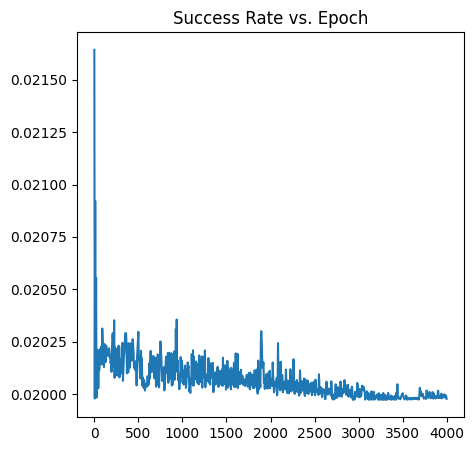

In [22]:
fig,ax = plt.subplots(1,figsize=(5,5))

ax.set_title("Success Rate vs. Epoch")
ax.plot(step_index[:],test_err[:])
print(test_err[-1])
plt.show()

In [24]:
folder_path = find_folder('PresidentialElections', search_path)
torch.save(model.state_dict(), os.path.join(folder_path, "presidential_model"))
print(os.path.join(folder_path, "presidential_model"))

/content/drive/MyDrive/ElectionForecast/PresidentialElections/presidential_model


In [ ]:
loss_fn = torch.nn.L1Loss()
lr = 0.001
nsteps = 1000


region_err = []

total_data = total_data_2016_2020
X_array = X_array_total
y_array = y_array_total

for i in range(len(total_data)):

  excluded_row = i

  X_tensor = torch.from_numpy(np.delete(X_array, excluded_row, axis=0)).to(device)
  y_tensor = torch.from_numpy(np.delete(y_array, excluded_row, axis=0)).to(device)

  y_tensor = y_tensor.reshape(84,1)
  X_test = torch.from_numpy(X_array[excluded_row,:]).to(device)
  y_test = torch.from_numpy(np.array(y_array[excluded_row])).to(device)




  layer_sizes = [7] + [10] + [1] + [1]
  model = FCNN_skip_connection(layer_sizes)

  model.to(device)

  # Optimizer
  optimizer = torch.optim.Adam(model.parameters(), lr=lr)



  # Train
  for i in range(nsteps):
      y = model(X_tensor)
      # Loss
      loss = loss_fn(y, y_tensor)
      optimizer.zero_grad()
      loss.backward()
      optimizer.step()
      # if i % 2 == 0 or i == nsteps - 1:
      #     with torch.no_grad():
      #         pred_y_test = model(X_test).detach().cpu()
      #     loss_test = loss_fn(pred_y_test, y_test)

      #     test_err.append(loss_test.item())

  with torch.no_grad():
      pred_y_test = model(X_test).detach().cpu()
  loss_test = loss_fn(pred_y_test, y_test)

  region_err.append(loss_test.item())


<ipython-input-134-e1300164161d>:16: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  state_poll = torch.tensor(x.clone().detach()[:,0])
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/loss.py:128: UserWarning: Using a target size (torch.Size([])) that is different to the input size (torch.Size([1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.l1_loss(input, target, reduction=self.reduction)


In [ ]:
np.mean(np.array(region_err))

0.02034732047468424

In [ ]:
region_election_err_abs = []
region_election_err = []
pred_winner = {}
pred_winner_polls = {}


election_results_y = total_data_2020.iloc[:, 1].to_numpy().astype(np.float32)
poll_results_y_0 = total_data_2020.iloc[:, 3].to_numpy().astype(np.float32)

for region in total_data_2020["Region"]:

  excluded_row = total_data_2020.index[total_data_2020['Region'] == region][0]
  y_test = election_results_y[excluded_row]
  X_test = torch.from_numpy(X_array_2020[excluded_row,:]).to(device)
  y_0 = poll_results_y_0[excluded_row]

  with torch.no_grad():
      pred_y_test = model(X_test).detach().cpu()

  final_err = y_test - (y_0 - pred_y_test.numpy()[0])

  if y_0 - pred_y_test.numpy()[0] > 0.5:
    pred_winner[region] = "D"
  else:
    pred_winner[region] = "R"

  if y_0 > 0.5:
    pred_winner_polls[region] = "D"
  else:
    pred_winner_polls[region] = "R"



  region_election_err.append(final_err)
  region_election_err_abs.append(np.abs(final_err))

R = 0
D = 0

R_polls = 0
D_polls = 0

for region in pred_winner:
  if pred_winner[region] == "D":
    D += electoral_college_2020.loc[electoral_college_2020['Region'] == region, 'votes'].values[0]
  else:
    R += electoral_college_2020.loc[electoral_college_2020['Region'] == region, 'votes'].values[0]


for region in pred_winner:
  if pred_winner_polls[region] == "D":
    D_polls += electoral_college_2020.loc[electoral_college_2020['Region'] == region, 'votes'].values[0]
  else:
    R_polls += electoral_college_2020.loc[electoral_college_2020['Region'] == region, 'votes'].values[0]


In [ ]:
D

262

In [ ]:
D_polls

338

In [ ]:
pred_winner

{'Arizona': 'R',
 'Florida': 'R',
 'Georgia': 'R',
 'Iowa': 'R',
 'Michigan': 'D',
 'Minnesota': 'D',
 'Nevada': 'D',
 'New Hampshire': 'D',
 'North Carolina': 'R',
 'Ohio': 'R',
 'Pennsylvania': 'R',
 'Texas': 'R',
 'Wisconsin': 'D',
 'Alabama': 'R',
 'Alaska': 'R',
 'Arkansas': 'R',
 'California': 'D',
 'Colorado': 'D',
 'Connecticut': 'D',
 'Delaware': 'D',
 'District of Columbia': 'D',
 'Hawaii': 'D',
 'Idaho': 'R',
 'Illinois': 'D',
 'Indiana': 'R',
 'Kansas': 'R',
 'Kentucky': 'R',
 'Louisiana': 'R',
 'Maine': 'D',
 'Maryland': 'D',
 'Massachusetts': 'D',
 'Mississippi': 'R',
 'Missouri': 'R',
 'Montana': 'D',
 'Nebraska': 'R',
 'New Jersey': 'D',
 'New Mexico': 'D',
 'New York': 'D',
 'North Dakota': 'R',
 'Oklahoma': 'R',
 'Oregon': 'D',
 'Rhode Island': 'D',
 'South Carolina': 'R',
 'South Dakota': 'R',
 'Tennessee': 'R',
 'Utah': 'R',
 'Vermont': 'D',
 'Virginia': 'D',
 'Washington': 'D',
 'West Virginia': 'R',
 'Wyoming': 'R'}

In [ ]:
np.mean(np.array(region_election_err_abs))

0.019086469

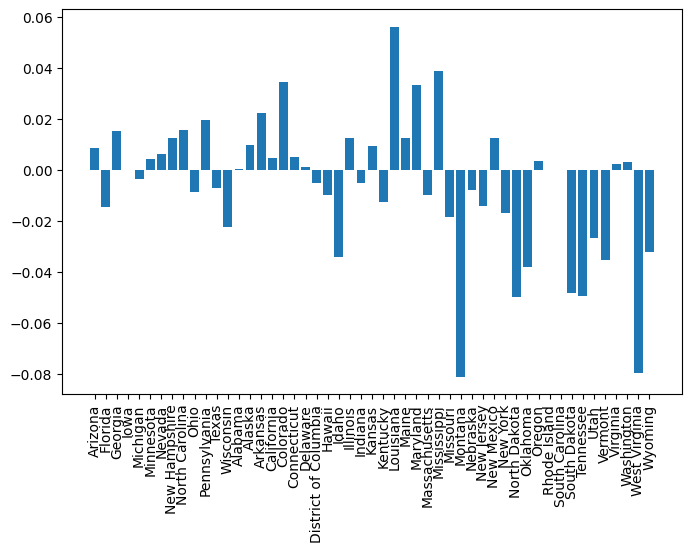

In [ ]:
fig,ax = plt.subplots(1,figsize=(8,5))

plt.bar(total_data_2020['Region'], region_election_err)
plt.xticks(rotation=90)

plt.show()

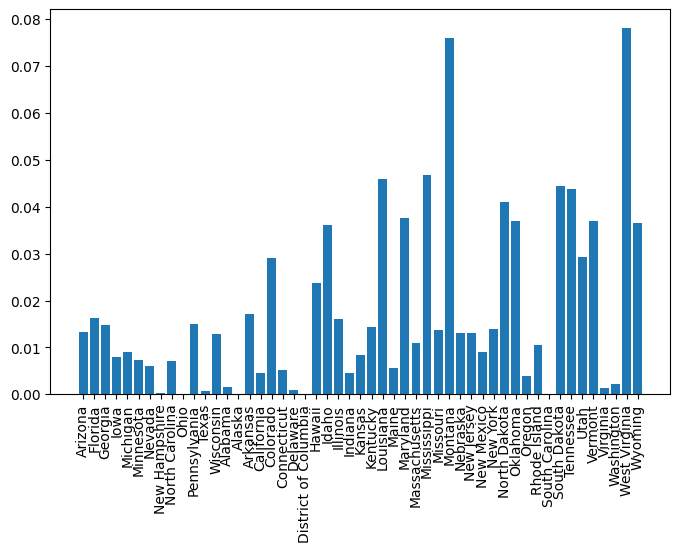

In [ ]:
fig,ax = plt.subplots(1,figsize=(8,5))

plt.bar(total_data['Region'], region_election_err_abs)
plt.xticks(rotation=90)

plt.show()